In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


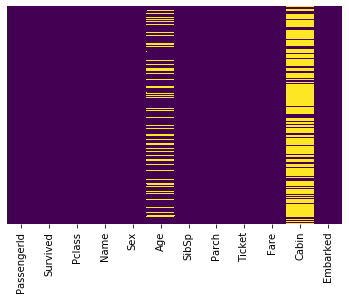

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
sns.set_style('whitegrid')

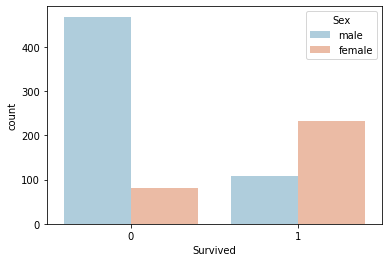

In [5]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

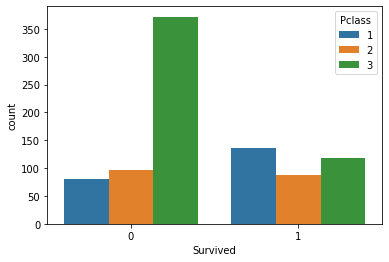

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=train)

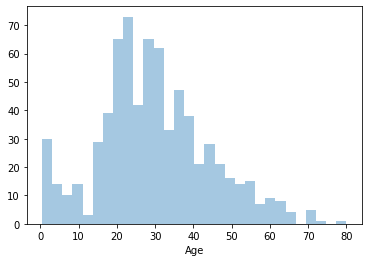

In [7]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

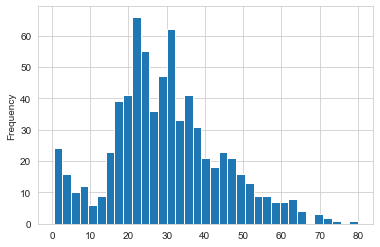

In [15]:
train['Age'].plot.hist(bins=35)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


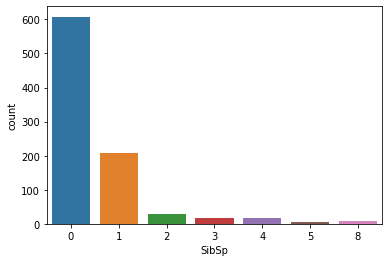

In [8]:
sns.countplot(x='SibSp',data=train)

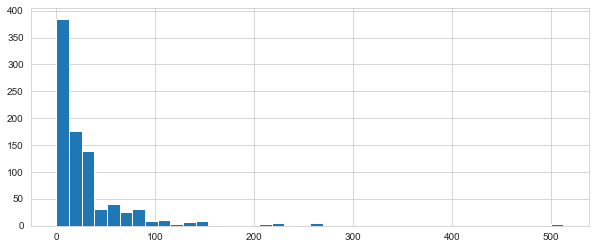

In [22]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [9]:
import cufflinks as cf

In [10]:
cf.go_offline()

In [28]:
#train['Fare'].iplot(kind='hist',bins=40)

# Logistic Regression With Python Part 2

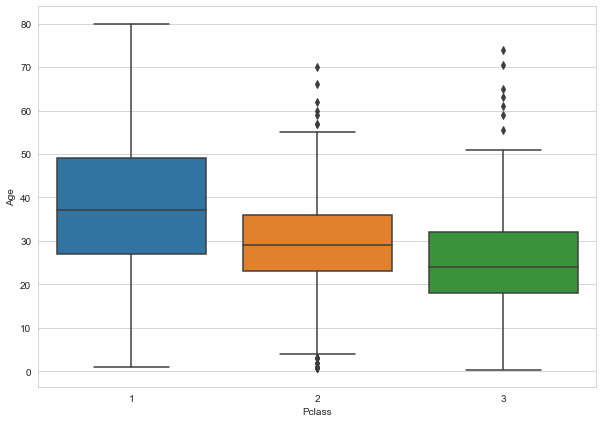

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [11]:
def imput_age(cols):
     Age=cols[0]
     Pclass=cols[1]
     if pd.isnull(Age):
            if Pclass==1:
                return 37
            elif Pclass==2:
                return 29
            else:
                return 24
            
     else:
        return Age

In [36]:
train['Age']=train[['Age','Pclass']].apply(imput_age,axis=1)

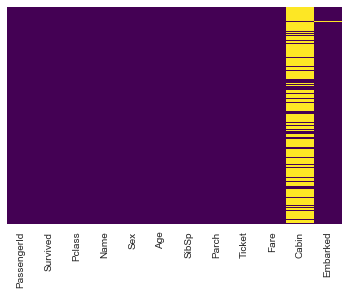

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
train.drop('Cabin',axis=1,inplace=True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


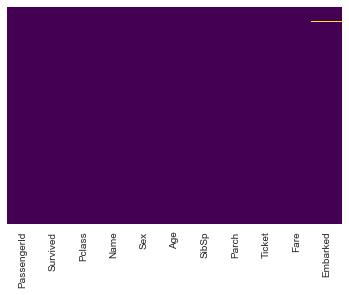

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train.dropna(inplace=True)

In [14]:
pd.get_dummies(train['Sex'])

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [15]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [16]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [17]:
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [18]:
train=pd.concat([train,sex,embark],axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [20]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


In [22]:
train.drop('PassengerId',axis=1,inplace=True)

In [23]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
871,1,1,47.0,1,1,52.5542,D35,0,0,1
872,0,1,33.0,0,0,5.0000,B51 B53 B55,1,0,1
879,1,1,56.0,0,1,83.1583,C50,0,0,0
887,1,1,19.0,0,0,30.0000,B42,0,0,1
889,1,1,26.0,0,0,30.0000,C148,1,0,0


In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,1,1,38.0,1,0,71.2833,C85,0,0,0
3,1,1,35.0,1,0,53.1000,C123,0,0,1
6,0,1,54.0,0,0,51.8625,E46,1,0,1
10,1,3,4.0,1,1,16.7000,G6,0,0,1
11,1,1,58.0,0,0,26.5500,C103,0,0,1


# Logistic Regression With python Part 3

In [33]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [34]:
x= x.apply(pd.to_numeric, errors='coerce')
y= y.apply(pd.to_numeric, errors='coerce')

In [35]:
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=LogisticRegression()

In [40]:
logmodel.fit(x_train,y_train)

D:\Install folder\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions=logmodel.predict(x_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53        31
           1       0.68      0.88      0.77        43

    accuracy                           0.69        74
   macro avg       0.70      0.65      0.65        74
weighted avg       0.70      0.69      0.67        74



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,predictions)

array([[13, 18],
       [ 5, 38]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,predictions)

0.6891891891891891